In [111]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
from tvDatafeed import TvDatafeed,Interval
import numpy as np

In [112]:
tv = TvDatafeed()

In [113]:
niftydf= tv.get_hist(symbol='ACC', exchange='NSE', interval=Interval.in_daily,n_bars=100)

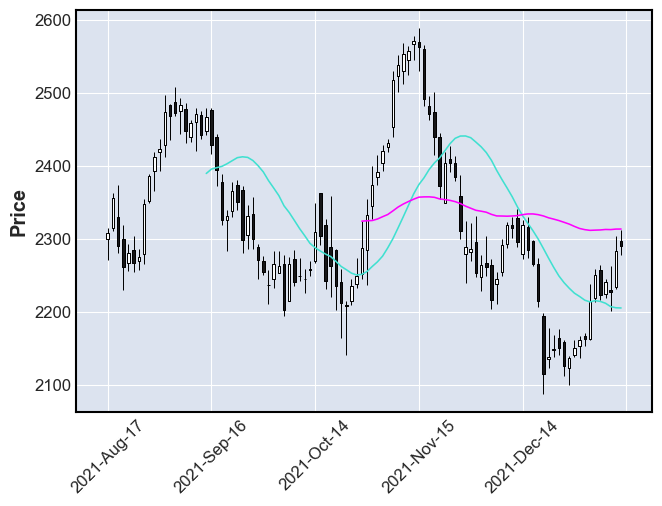

In [114]:
x=mpf.plot(niftydf, type='candle', mav=(20,50))


In [115]:
niftydf['SMA20']=niftydf['close'].rolling(window=20).mean()
niftydf['SMA50']=niftydf['close'].rolling(window=50).mean()

In [116]:
buy=np.where((niftydf['SMA20'].shift(-1)>niftydf['SMA50'].shift(-1)),1,np.nan)*0.98*niftydf['low']

In [117]:
sell=np.where((niftydf['SMA20'].shift(-1)<niftydf['SMA50'].shift(-1)),1,np.nan)*1.02*niftydf['low']

In [124]:
apd = [mpf.make_addplot(buy, scatter=True, markersize=50, marker=r'$\Uparrow$', color='green'),mpf.make_addplot(sell, scatter=True, markersize=50, marker=r'$\Downarrow$', color='red'),mpf.make_addplot(niftydf['SMA20']), mpf.make_addplot(niftydf['SMA50']),mpf.make_addplot(a)]


In [128]:
niftydf.to_csv('fag.csv')

In [127]:
a=np.where(niftydf['SMA20']=niftydf['SMA50'],1,np.nan)
a

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-127-5b4a48d224b5>, line 1)

ValueError: zero-size array to reduction operation maximum which has no identity

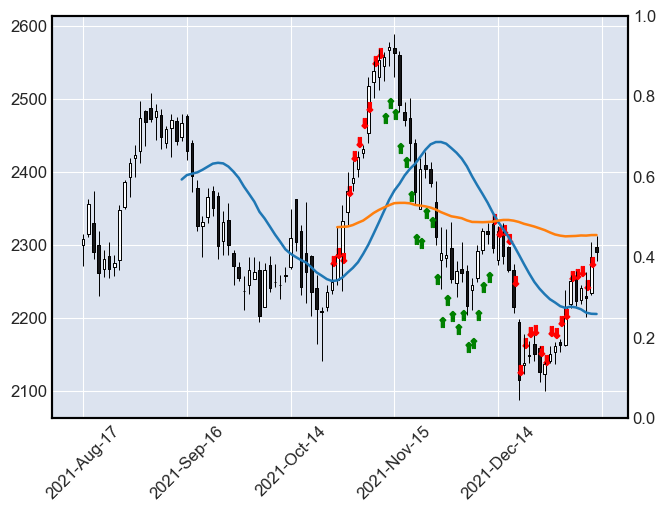

In [125]:
mpf.plot(niftydf, type='candle', addplot=apd)

In [120]:
buy.to_csv('buy.csv')

In [121]:
pnl=buy.sum()-sell.sum()
pnl

-20476.494000000006